In [5]:
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from tensorboard.backend.event_processing import event_accumulator

def get_metrics(path_logs, metric_name='epoch_loss', full_logs=True):
    train_logs = [x for x in os.listdir(path_logs) if x.endswith('.v2')][0]
    path_train = os.path.join(path_logs, train_logs)
    
    if full_logs:
        ea = event_accumulator.EventAccumulator(path_train, size_guidance={'tensors': 0})
    else:
        ea = event_accumulator.EventAccumulator(path_train)

    ea.Reload()   
    
    metrics = pd.DataFrame([(w,s,tf.make_ndarray(t))for w,s,t in ea.Tensors(metric_name)],
                columns=['wall_time', 'step', 'value'])
    
    metrics['value'] = metrics['value'].astype('float')
    metrics['step'] = metrics['step'].astype('int')
    metrics['wall_time']  = metrics['wall_time'].astype('float')
    return metrics

In [3]:
logs_path = './ztfg/logs/'

train_metrics = get_metrics(os.path.join(logs_path, 'train'))

valid_metrics = get_metrics(os.path.join(logs_path, 'validation'))


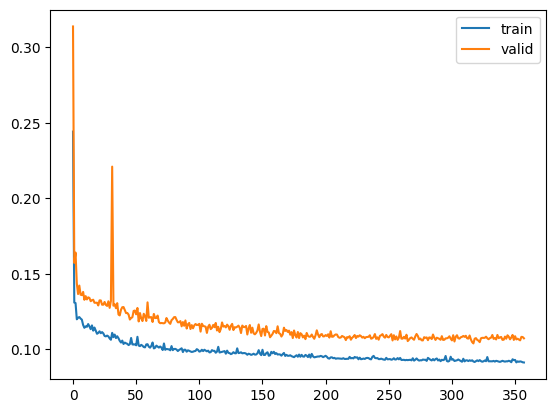

In [4]:
plt.plot(train_metrics['step'].values, train_metrics['value'].values, label='train')
plt.plot(valid_metrics['step'].values, valid_metrics['value'].values, label='valid')
plt.legend()